In [1]:
import sympy as sm
import sympy.physics.mechanics as me

Enable nicer printing for time derivatives, etc.

In [2]:
me.init_vprinting()

# Define variables and constants

Reference Figure 2.6.1 in the book.

The angular velocity of B in A and the distance between P1 and P2 are fixed.

In [3]:
w, L = sm.symbols("omega, L")
w, L

In [4]:
q1, q2, q3 = me.dynamicsymbols('q1:4')

In [5]:
t = me.dynamicsymbols._t

# Setting orientations of reference frames

Setup the orientations as two simple rotations.

In [6]:
A = me.ReferenceFrame('A')
B = me.ReferenceFrame('B')
E = me.ReferenceFrame('E')

In [7]:
B.orient(A, 'Axis', (w*t, A.y))

In [8]:
E.orient(B, 'Axis', (q3, B.z))

Calculate the angular velocit of E in A.

In [9]:
E.ang_vel_in(A).express(E)

# Setting positions of points

Now, create the three point of interest.

In [10]:
O = me.Point('O')
P1 = me.Point('P1')
P2 = me.Point('P2')

The vector $\mathbf{p}_1$ connects O to P1.

In [11]:
p1 = q1*B.x + q2*B.y

Now we need to define the position relationships between the various points. You do this by using the `set_pos()` method of `Point`.

In [12]:
P1.set_pos?

Signature: P1.set_pos(otherpoint, value)
Docstring:
Used to set the position of this point w.r.t. another point.

Parameters

otherpoint : Point
    The other point which this point's location is defined relative to
value : Vector
    The vector which defines the location of this point

Examples

>>> from sympy.physics.vector import Point, ReferenceFrame
>>> N = ReferenceFrame('N')
>>> p1 = Point('p1')
>>> p2 = Point('p2')
>>> p1.set_pos(p2, 10 * N.x)
>>> p1.pos_from(p2)
10*N.x
File:      /opt/conda/lib/python3.6/site-packages/sympy/physics/vector/point.py
Type:      method


In [13]:
P1.set_pos(O, p1)

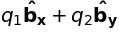

In [14]:
P1.pos_from(O)

You do not have to define all points relative to O explicitly, you can define the relative positions between points, as it usually simpler.

In [15]:
P2.set_pos(P1, L*E.x)

Once these intermediate definitions are in place, you can use `pos_from()` to calculate any vectors you need.

In [16]:
P2.pos_from?

Signature: P2.pos_from(otherpoint)
Docstring:
Returns a Vector distance between this Point and the other Point.

Parameters

otherpoint : Point
    The otherpoint we are locating this one relative to

Examples

>>> from sympy.physics.vector import Point, ReferenceFrame
>>> N = ReferenceFrame('N')
>>> p1 = Point('p1')
>>> p2 = Point('p2')
>>> p1.set_pos(p2, 10 * N.x)
>>> p1.pos_from(p2)
10*N.x
File:      /opt/conda/lib/python3.6/site-packages/sympy/physics/vector/point.py
Type:      method


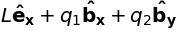

In [17]:
P2.pos_from(O)

In [18]:
P2.pos_from(O).express(E)

# Setting and calculating velocities

Point O is the reference point in this problem. All velocities and accelerations of interest are with respect to this point. It is also fixed in A, so we need to specify its velocity in A to be zero.

In [19]:
O.set_vel(A, 0)

Every velocity must be defined explicitly. To start, set the velocity of P1 as the time derivative of the position vector from O to P1.

In [20]:
P1.set_vel(A, p1.dt(A))

P1 and P2 are both fixed in E and the velocity of P1 in A is now defined, so the two point velocity thereom can be applied to determine the velocity of P2 in A. Note that we already computed the angular velocity of E in A, which is needed.

In [21]:
P2.v2pt_theory?

Signature: P2.v2pt_theory(otherpoint, outframe, fixedframe)
Docstring:
Sets the velocity of this point with the 2-point theory.

The 2-point theory for point velocity looks like this:

^N v^P = ^N v^O + ^N omega^B x r^OP

where O and P are both points fixed in frame B, which is rotating in
frame N.

Parameters

otherpoint : Point
    The first point of the 2-point theory (O)
outframe : ReferenceFrame
    The frame we want this point's velocity defined in (N)
fixedframe : ReferenceFrame
    The frame in which both points are fixed (B)

Examples

>>> from sympy.physics.vector import Point, ReferenceFrame, dynamicsymbols
>>> q = dynamicsymbols('q')
>>> qd = dynamicsymbols('q', 1)
>>> N = ReferenceFrame('N')
>>> B = N.orientnew('B', 'Axis', [q, N.z])
>>> O = Point('O')
>>> P = O.locatenew('P', 10 * B.x)
>>> O.set_vel(N, 5 * N.x)
>>> P.v2pt_theory(O, N, B)
5*N.x + 10*q'*B.y
File:      /opt/conda/lib/python3.6/site-packages/sympy/physics/vector/point.py
Type:      method


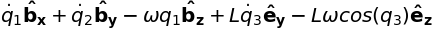

In [22]:
P2.v2pt_theory(P1, A, E)

The same notation is used to calculate the acceleration of P2 in A:

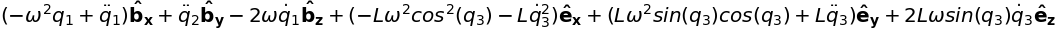

In [23]:
P2.a2pt_theory(P1, A, E)

`v2pt_theory()` and `a2pt_theory()` set the velocities of the points, so `vel()` and `acc()` will return the expected answers after you call those two point functions.

In [24]:
P2.acc(A).express(E)